In [1]:
# Importing required libraries
import pandas as pd
from sodapy import Socrata
import numpy as np
import requests
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Importing required API(Yellow Trip Data-2015-January-June)
client = Socrata("data.cityofnewyork.us",
                  "woqOj0yWsQzkpr7i6BVEGMKqV",    # Using my account credentials to get access to API
                  "puneetag@buffalo.edu",         # NOTE: Use your own account credentials.
                  "Cobrasss02$")
results = client.get("2yzn-sicd", limit=1100000)   # Importing first 1000000 rows of data

In [69]:
# Creating a dataframe of train_data(first 1 million rows)
train_data = pd.DataFrame.from_records(results[:1000000])

In [70]:
# Creating a dataframe of test_data(last 100000 rows)
test_data = pd.DataFrame.from_records(results[-100000:])

In [71]:
# Function to convert datetime datatype to just date
import datetime
def date1(tmp):
    dt=datetime.datetime.strptime(tmp,'%Y-%m-%dT%H:%M:%S.000')
    dt.date()
    dd=dt.date()
    return (dd)
train_data["Pickup Date"]=train_data["pickup_datetime"].apply(date1)
train_data["Dropoff Date"]=train_data["dropoff_datetime"].apply(date1)
test_data["Pickup Date"]=test_data["pickup_datetime"].apply(date1)
test_data["Dropoff Date"]=test_data["dropoff_datetime"].apply(date1)

In [72]:
# Function to convert datetime datatype to just time
def date2(tmp):
    dt=datetime.datetime.strptime(tmp,'%Y-%m-%dT%H:%M:%S.000')
    dt.time()
    dd=dt.time()
    return (dd)
train_data["Pickup time"]=train_data["pickup_datetime"].apply(date2)
train_data["Dropoff time"]=train_data["dropoff_datetime"].apply(date2)
test_data["Pickup time"]=test_data["pickup_datetime"].apply(date2)
test_data["Dropoff time"]=test_data["dropoff_datetime"].apply(date2)

In [73]:
# Converting object datatype to float for the required columns
train_data['pickup_latitude'] = train_data['pickup_latitude'].astype(float)
train_data['pickup_longitude'] = train_data['pickup_longitude'].astype(float)
train_data['dropoff_latitude'] = train_data['dropoff_latitude'].astype(float)
train_data['dropoff_longitude'] = train_data['dropoff_longitude'].astype(float)
train_data['fare_amount'] = train_data['fare_amount'].astype(float)
train_data['passenger_count'] = train_data['passenger_count'].astype(float)
train_data['trip_distance'] = train_data['trip_distance'].astype(float)

test_data['pickup_latitude'] = test_data['pickup_latitude'].astype(float)
test_data['pickup_longitude'] = test_data['pickup_longitude'].astype(float)
test_data['dropoff_latitude'] = test_data['dropoff_latitude'].astype(float)
test_data['dropoff_longitude'] = test_data['dropoff_longitude'].astype(float)
test_data['fare_amount'] = test_data['fare_amount'].astype(float)
test_data['passenger_count'] = test_data['passenger_count'].astype(float)
test_data['trip_distance'] = test_data['trip_distance'].astype(float)

In [74]:
# Extracting trip duration for test and train data
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data['dropoff_datetime'] = pd.to_datetime(train_data.dropoff_datetime)
train_data['seconds']= train_data['dropoff_datetime']-train_data['pickup_datetime']
train_data['seconds'] = train_data['seconds'].dt.total_seconds()

test_data['pickup_datetime'] = pd.to_datetime(test_data.pickup_datetime)
test_data['dropoff_datetime'] = pd.to_datetime(test_data.dropoff_datetime)
test_data['seconds']= test_data['dropoff_datetime']-test_data['pickup_datetime']
test_data['seconds'] = test_data['seconds'].dt.total_seconds()

In [75]:
# Extracting month for taxi drop off for test and train data
train_data['dropoff_datetime'] = pd.to_datetime(train_data.dropoff_datetime)
train_data['dropoff_month'] = train_data['dropoff_datetime'].dt.month

test_data['dropoff_datetime'] = pd.to_datetime(test_data.dropoff_datetime)
test_data['dropoff_month'] = test_data['dropoff_datetime'].dt.month

In [76]:
train_data['pickup_month'] = train_data['pickup_datetime'].dt.month # Extract month
train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour # Extract hour
train_data['pickup_weekday'] = train_data['pickup_datetime'].dt.dayofweek # Extract day of week

test_data['pickup_month'] = test_data['pickup_datetime'].dt.month # Extract month
test_data['pickup_hour'] = test_data['pickup_datetime'].dt.hour # Extract hour
test_data['pickup_weekday'] = test_data['pickup_datetime'].dt.dayofweek # Extract day of week

In [77]:
# Remove passenger_count outliers
train_data = train_data[train_data['passenger_count']>0]
train_data = train_data[train_data['passenger_count']<9]

# Remove coordinate outliers
train_data = train_data[train_data['pickup_longitude'] <= -73.75]
train_data = train_data[train_data['pickup_longitude'] >= -74.03]
train_data = train_data[train_data['pickup_latitude'] <= 40.85]
train_data = train_data[train_data['pickup_latitude'] >= 40.63]
train_data = train_data[train_data['dropoff_longitude'] <= -73.75]
train_data = train_data[train_data['dropoff_longitude'] >= -74.03]
train_data = train_data[train_data['dropoff_latitude'] <= 40.85]
train_data = train_data[train_data['dropoff_latitude'] >= 40.63]

# Remove trip_duration outliers
trip_duration_mean = np.mean(train_data['seconds'])
trip_duration_std = np.std(train_data['seconds'])
train_data = train_data[train_data['seconds']<=trip_duration_mean + 2*trip_duration_std]
train_data = train_data[train_data['seconds']>= trip_duration_mean - 2*trip_duration_std]

train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dropoff_latitude,969527.0,40.751382,0.029527,40.630009,40.736012,40.754265,40.769176,40.849991
dropoff_longitude,969527.0,-73.973542,0.033205,-74.029984,-73.991364,-73.980103,-73.963860,-73.750023
fare_amount,969527.0,12.740112,10.101461,-100.000000,6.500000,9.500000,15.000000,998.890000
passenger_count,969527.0,1.679290,1.325780,1.000000,1.000000,1.000000,2.000000,6.000000
pickup_latitude,969527.0,40.750821,0.027458,40.630024,40.737171,40.753853,40.768333,40.849983
pickup_longitude,969527.0,-73.973734,0.037735,-74.029434,-73.992027,-73.981918,-73.967590,-73.750038
trip_distance,969527.0,2.974723,81.055704,0.000000,1.000000,1.700000,3.120000,79740.300000
seconds,969527.0,854.846525,669.032649,-3294.000000,406.000000,677.000000,1098.000000,7518.000000
dropoff_month,969527.0,10.493972,1.111361,1.000000,10.000000,10.000000,11.000000,12.000000
pickup_month,969527.0,10.494167,1.109669,9.000000,10.000000,10.000000,11.000000,12.000000


In [78]:
# Remove passenger_count outliers
test_data = test_data[test_data['passenger_count']>0]
test_data = test_data[test_data['passenger_count']<9]

# Remove coordinate outliers
test_data = test_data[test_data['pickup_longitude'] <= -73.75]
test_data = test_data[test_data['pickup_longitude'] >= -74.03]
test_data = test_data[test_data['pickup_latitude'] <= 40.85]
test_data = test_data[test_data['pickup_latitude'] >= 40.63]
test_data = test_data[test_data['dropoff_longitude'] <= -73.75]
test_data = test_data[test_data['dropoff_longitude'] >= -74.03]
test_data = test_data[test_data['dropoff_latitude'] <= 40.85]
test_data = test_data[test_data['dropoff_latitude'] >= 40.63]

# Remove trip_duration outliers
trip_duration_mean = np.mean(test_data['seconds'])
trip_duration_std = np.std(test_data['seconds'])
test_data = test_data[test_data['seconds']<=trip_duration_mean + 2*trip_duration_std]
test_data = test_data[test_data['seconds']>= trip_duration_mean - 2*trip_duration_std]

test_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
dropoff_latitude,97090.0,40.751485,0.029637,40.630089,40.736172,40.754360,40.769377,40.849983
dropoff_longitude,97090.0,-73.973443,0.033207,-74.029770,-73.991280,-73.980000,-73.963547,-73.750458
fare_amount,97090.0,12.745683,9.991117,-250.000000,6.500000,9.500000,15.000000,254.000000
passenger_count,97090.0,1.683273,1.330746,1.000000,1.000000,1.000000,2.000000,6.000000
pickup_latitude,97090.0,40.750871,0.027499,40.631058,40.737179,40.753904,40.768360,40.849854
pickup_longitude,97090.0,-73.973602,0.037903,-74.027618,-73.992043,-73.981888,-73.967422,-73.755829
trip_distance,97090.0,2.905097,3.570650,0.000000,1.000000,1.700000,3.160000,175.700000
seconds,97090.0,990.953940,3429.548315,-2281.000000,405.000000,680.000000,1103.000000,86380.000000
dropoff_month,97090.0,10.492728,1.110167,1.000000,10.000000,10.000000,11.000000,12.000000
pickup_month,97090.0,10.493079,1.107754,9.000000,10.000000,10.000000,11.000000,12.000000


In [79]:
# Create matrix of features
X = train_data[['vendor_id','passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','pickup_month', 'pickup_hour',
       'pickup_weekday']] # double brackets!

In [80]:
# Create array of target variable 
y = train_data['seconds']

# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [81]:
#  Import model
from sklearn.linear_model import LinearRegression

#  Instantiate model object
lreg = LinearRegression()

# Fit to training data
lreg.fit(X_train,y_train)
print(lreg)

# Predict
y_pred_lreg = lreg.predict(X_test)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lreg)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear Regression Performance Metrics
('R^2=', 0.22986857503456704)
('MAE:', 424.65875178154437)
('MSE:', 347708.95634404832)
('RMSE:', 589.66851395003982)


In [82]:
# Fit
# Import model
from sklearn.tree import DecisionTreeRegressor

# Instantiate model object
dtree = DecisionTreeRegressor()

# Fit to training data
dtree.fit(X_train,y_train)
print(dtree)

# Predict
y_pred_dtree = dtree.predict(X_test)

# Score It
from sklearn import metrics
print('\nDecision Tree Regression Performance Metrics')
print('R^2=',metrics.explained_variance_score(y_test,y_pred_dtree))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_dtree))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_dtree))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtree)))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Decision Tree Regression Performance Metrics
('R^2=', 0.5293775506061158)
('MAE:', 288.98949490990481)
('MSE:', 212648.3648030489)
('RMSE:', 461.13811900888101)


In [83]:
# Fit 
# Import model
from sklearn.ensemble import RandomForestRegressor 

# Instantiate model object
rforest = RandomForestRegressor(n_estimators = 20, n_jobs = -1)

# Fit to training data
rforest = rforest.fit(X_train,y_train)
print(rforest)

# Predict
y_pred_rforest = rforest.predict(X_test)

# Score It
from sklearn import metrics
print('\nRandom Forest Regression Performance Metrics')
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_rforest))
print('MAE',metrics.mean_absolute_error(y_test, y_pred_rforest))
print('MSE',metrics.mean_squared_error(y_test, y_pred_rforest))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, y_pred_rforest)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Random Forest Regression Performance Metrics
('R^2 =', 0.76127307413424272)
('MAE', 208.31535109795468)
('MSE', 107910.28632772385)
('RMSE', 328.49701113971167)


In [84]:
# Create new matrix of features from test data
X_test= test_data[['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','pickup_month', 'pickup_hour',
       'pickup_weekday']]
X_test.describe()

# Feed features into random forest
y_pred= rforest.predict(X_test)
y_pred

array([  823.4 ,   375.35,   782.6 , ...,   279.1 ,   399.15,  1146.15])

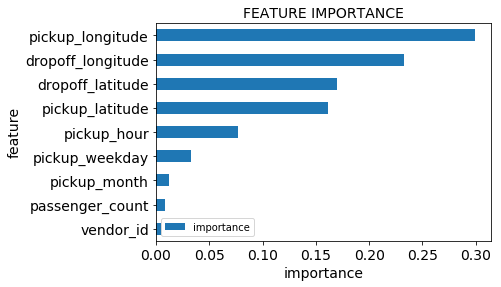

In [85]:
#plot of feature importance
plt.figure(figsize=(50,50))
pd.DataFrame({'feature': X_train.columns, \
              'importance': rforest.feature_importances_})\
              .sort_values('importance').set_index('feature')\
              .plot(kind='barh', fontsize=14)

plt.title('FEATURE IMPORTANCE',fontsize=14 )
plt.xlabel('importance',fontsize=14)
plt.ylabel('feature',fontsize=14)
plt.show()

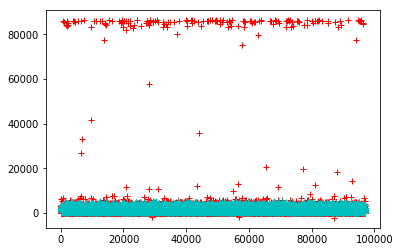

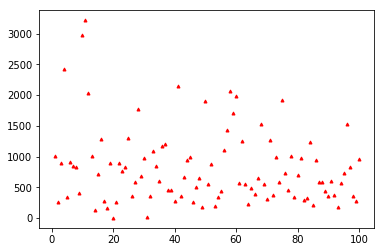

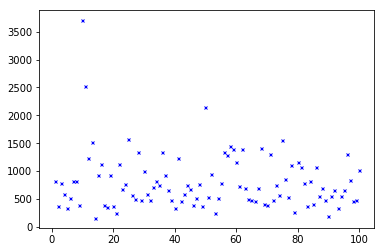

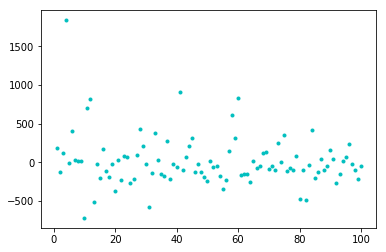

In [86]:
rn = test_data.shape[0]
test_data['index']=np.arange(1,rn+1)
plt.plot(test_data['index'],test_data['seconds'],'r+',test_data['index'],y_pred,'c+')
plt.show()
yy= y_pred[:100]
yy
xx= test_data['seconds'][:100]
xx
il = test_data['index'][:100]
il
plt.plot(il,xx,'r^',ms=3)
plt.show()
plt.plot(il,yy,'bx',ms=3)
plt.show()
plt.plot(il,(xx-yy),'co',ms=3)
plt.show()

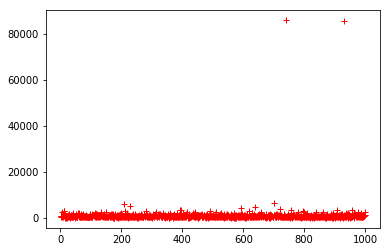

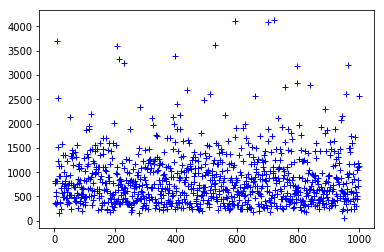

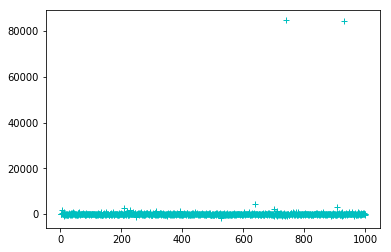

In [87]:
yy= y_pred[:1000]
yy
xx= test_data['seconds'][:1000]
xx
il = test_data['index'][:1000]
il
plt.plot(il,xx,'r+')
plt.show()
plt.plot(il,yy,'b+')
plt.show()
plt.plot(il,(xx-yy),'c+')
plt.show()

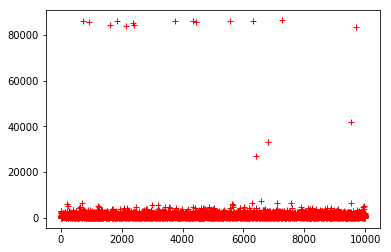

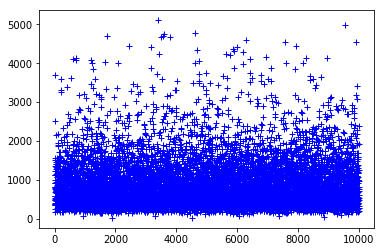

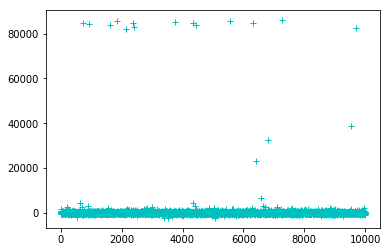

In [88]:
yy= y_pred[:10000]
yy
xx= test_data['seconds'][:10000]
xx
il = test_data['index'][:10000]
il
plt.plot(il,xx,'r+')
plt.show()
plt.plot(il,yy,'b+')
plt.show()
plt.plot(il,(xx-yy),'c+')
plt.show()

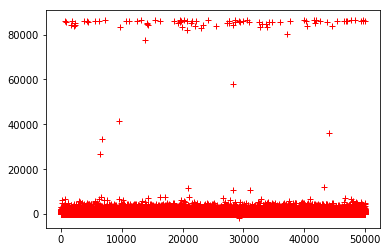

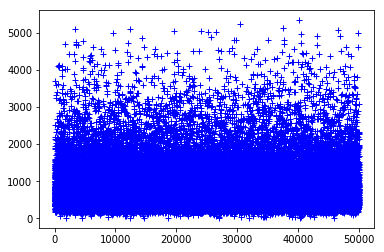

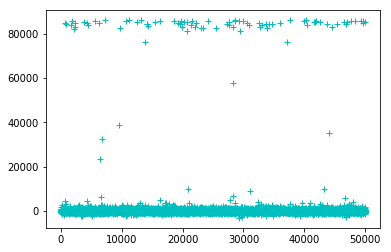

In [89]:
yy= y_pred[:50000]
yy
xx= test_data['seconds'][:50000]
xx
il = test_data['index'][:50000]
il
plt.plot(il,xx,'r+')
plt.show()
plt.plot(il,yy,'b+')
plt.show()
plt.plot(il,(xx-yy),'c+')
plt.show()

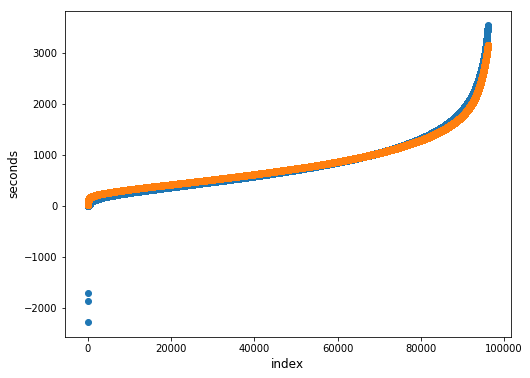

In [90]:
plt.figure(figsize=(8,6))
z = test_data.seconds.quantile(0.99)
test_data = test_data[test_data.seconds < z]
plt.scatter(range(test_data.shape[0]), np.sort(test_data.seconds.values))
y_pred = pd.DataFrame(y_pred)
y_pred[y_pred.columns[0]]
y = y_pred.quantile(0.99)
y_pred = y_pred[y_pred< y]
y_pred
y_pred.shape[0]
np.sort(y_pred[0].values)
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred[0].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('seconds', fontsize=12)
plt.show()

In [101]:
# For Model 2 What will be the best location to pick-up customers for each day of the week of a month?
# Import Libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from geopy.geocoders import Nominatim
from scipy import cluster
from random import randint
import time

In [102]:
#create new column call weekday
model1=train_data.copy()
timestamp = pd.to_datetime(pd.Series(model1['pickup_datetime']))
model1['weekday'] = timestamp.dt.weekday_name

In [103]:
# Selecting columns of interest
model1 = pd.DataFrame(model1, columns=['pickup_datetime','pickup_latitude','pickup_longitude','weekday'])

In [105]:
#get rid off some garbage data
model1=model1[(model1['pickup_latitude'] > 40.492083) & (model1['pickup_latitude']<40.944536) &
     (model1['pickup_longitude']> -74.267880)& (model1['pickup_longitude']< -73.662022)]
model1

,pickup_datetime,pickup_latitude,pickup_longitude,weekday
0,2015-12-12 23:51:45,40.713615,-73.960823,Saturday
1,2015-10-08 18:16:28,40.745209,-73.978752,Thursday
2,2015-11-05 22:43:00,40.761482,-73.983971,Thursday
3,2015-12-22 20:46:08,40.780861,-73.949516,Tuesday
4,2015-12-23 02:26:36,40.729298,-73.987091,Wednesday
5,2015-12-20 19:39:44,40.774071,-73.872978,Sunday
6,2015-11-13 22:27:31,40.737122,-73.974274,Friday
7,2015-09-05 23:21:56,40.748676,-74.007278,Saturday
8,2015-11-20 21:25:53,40.643410,-73.788330,Friday
10,2015-11-11 23:55:26,40.724689,-73.997528,Wednesday


In [106]:
#regression function for calculating score
def fit_model(X, y):
    model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])
    model.fit(X, y)
    return model

def score_model(model, X, y, Xv, yv):
    return tuple([model.score(X, y), model.score(Xv, yv)])

def fit_model_and_score(data, response, validation, val_response):
    model = fit_model(data, response)
    return score_model(model, data, response, validation, val_response)

In [107]:
#convert to address
def convert_to_address(coordinate):
    geolocator = Nominatim()
    location = geolocator.reverse(coordinate)
    return location.address

In [118]:
#get best location for each weekday in a month
def poly_regression(my_month,my_weekday,model1):
    #get all the selected weekdays in selected month
    df_select=model1[(model1['weekday']==my_weekday) & 
                 (pd.to_datetime(model1['pickup_datetime']) < pd.datetime(2015,my_month+1,1))&
                (pd.to_datetime(model1['pickup_datetime']) > pd.datetime(2015,my_month,1))]
    
    df_select=df_select[:70000]
    #use Kmean to group data by longitude and latitude
    my_cluster=100
    lon=df_select['pickup_longitude'].values
    lat=df_select['pickup_latitude'].values
    coodinate_array=np.array([[lon[i],lat[i]] for i in range(len(lon))])

    kmeans_n = KMeans(n_clusters=my_cluster,n_init=1,random_state=1000)
    kmeans_n.fit(coodinate_array)
    labels = kmeans_n.labels_
    
    # add new column call cluster
    df_select['Cluster']=labels
    
    #prepare for regression
    Cluster_size=df_select.groupby('Cluster').size()
    Cluster_size=np.array([[Cluster_size[i]] for i in range(len(Cluster_size))])
    Cluster_center=kmeans_n.cluster_centers_
    
    #get training data and testing data
    train_size=int(len(Cluster_size)*0.8)
    test_size=int(len(Cluster_size)*0.2)
    train_feature=Cluster_size[:train_size]
    train_response=Cluster_center[:train_size]
    test_feature=Cluster_size[test_size:]
    test_response=Cluster_center[test_size:]
    
    #coefficient of determination (R^2)
    print ("coefficient of determination (R^2):",fit_model_and_score(train_feature, train_response,
                           test_feature, test_response))
    
    #use mean squared error to evaluation model
    MSE_model=Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])
    MSE_model.fit(train_feature, train_response)
    X_MSE=(test_feature)
    y_MSE = MSE_model.predict(X_MSE)
    print("MSE: ",mean_squared_error(test_response, y_MSE))
    
    #predict best location
    X=Cluster_size
    y=Cluster_center

    prediction_model=Pipeline([('poly', PolynomialFeatures(degree=3)),
                    ('linear', LinearRegression(fit_intercept=False))])
    prediction_model.fit(X, y)
    X_predict=([max(Cluster_size)])
    y_predict = prediction_model.predict(X_predict)
    print("best location for ",my_weekday, y_predict)
    
    #prepare for visualization
    for data in y_predict:
        visual_x=data[[0]]
        visual_y=data[[1]]
    
    for i in range(len(Cluster_size)):
        if (Cluster_size[i]==Cluster_size.max()):
            max_size_cluster=i
        
    actual_value=kmeans_n.cluster_centers_[max_size_cluster]
    actual_x=actual_value[0]
    actual_y=actual_value[1]
        
    #convert to address
    print("address: ",convert_to_address(str(visual_y[0])+","+str(visual_x[0])))
    
    #visualization for Kmean
    colors = []

    for i in range(my_cluster):
        colors.append('#%06X' % randint(0, 0xFFFFFF))

    plt.figure(figsize=(18,9))
    for i in range(my_cluster):
        my_cluster_df=df_select[df_select['Cluster']==i]
        lon_x=my_cluster_df.pickup_longitude.values
        lat_y=my_cluster_df.pickup_latitude.values
        plt.scatter(lon_x,lat_y,alpha=0.2,s=100,c=colors[i])

    plt.axis([visual_x-0.1,visual_x+0.1,visual_y-0.1,visual_y+0.1])
    plt.title("visualization for kmean")
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.show()
        
    #scatter plot all the data for selected weekday and prediction(best location in red)
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    x_points=lon
    y_points=lat
    ax.scatter(lon,lat,alpha=0.2,s=100)
    ax.scatter(visual_x,visual_y ,c='r',s=100)
    ax.scatter(actual_x,actual_y ,c='y',s=100)
    ax.axis([visual_x-0.05,visual_x+0.05,visual_y-0.05,visual_y+0.05])
    ax.title.set_text("Best pick up location (red point=predicted point, yellow point=actual point)")

In [119]:
train_data

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,imp_surcharge,mta_tax,passenger_count,payment_type,pickup_datetime,...,vendor_id,Pickup Date,Dropoff Date,Pickup time,Dropoff time,seconds,dropoff_month,pickup_month,pickup_hour,pickup_weekday
0,2015-12-13 00:29:29,40.751167,-73.984589,0.5,25.5,0.3,0.5,1.0,1,2015-12-12 23:51:45,...,1,2015-12-12,2015-12-13,23:51:45,00:29:29,2264.0,12,12,23,5
1,2015-10-08 18:36:54,40.767487,-73.966187,1,13.5,0.3,0.5,1.0,2,2015-10-08 18:16:28,...,1,2015-10-08,2015-10-08,18:16:28,18:36:54,1226.0,10,10,18,3
2,2015-11-05 22:59:16,40.733547,-73.991005,0.5,12.0,0.3,0.5,1.0,1,2015-11-05 22:43:00,...,1,2015-11-05,2015-11-05,22:43:00,22:59:16,976.0,11,11,22,3
3,2015-12-22 20:52:39,40.788639,-73.955048,0.5,6.0,0.3,0.5,6.0,1,2015-12-22 20:46:08,...,2,2015-12-22,2015-12-22,20:46:08,20:52:39,391.0,12,12,20,1
4,2015-12-23 02:49:13,40.705605,-73.802605,0.5,38.0,0.3,0.5,1.0,1,2015-12-23 02:26:36,...,1,2015-12-23,2015-12-23,02:26:36,02:49:13,1357.0,12,12,2,2
5,2015-12-20 19:56:06,40.746769,-73.981003,0,24.0,0.3,0.5,1.0,1,2015-12-20 19:39:44,...,2,2015-12-20,2015-12-20,19:39:44,19:56:06,982.0,12,12,19,6
6,2015-11-13 22:38:12,40.725391,-73.986786,0.5,9.0,0.3,0.5,6.0,1,2015-11-13 22:27:31,...,2,2015-11-13,2015-11-13,22:27:31,22:38:12,641.0,11,11,22,4
7,2015-09-05 23:33:29,40.733456,-73.979958,0.5,9.5,0.3,0.5,1.0,2,2015-09-05 23:21:56,...,2,2015-09-05,2015-09-05,23:21:56,23:33:29,693.0,9,9,23,5
8,2015-11-20 21:39:42,40.707947,-73.801758,0.5,19.0,0.3,0.5,1.0,3,2015-11-20 21:25:53,...,1,2015-11-20,2015-11-20,21:25:53,21:39:42,829.0,11,11,21,4
10,2015-11-12 00:00:12,40.710808,-74.009537,0.5,5.5,0.3,0.5,1.0,1,2015-11-11 23:55:26,...,1,2015-11-11,2015-11-12,23:55:26,00:00:12,286.0,11,11,23,2


('coefficient of determination (R^2):', (0.1977786469887545, 0.17575233761666306))
('MSE: ', 0.0020074482018980805)
('best location for ', 'Monday', array([[-73.99959463,  40.75135402]]))
('address: ', u'Morgan General Mail Facility, West 29th Street, Chelsea, Manhattan Community Board 4, New York County, NYC, New York, 10001, United States of America')


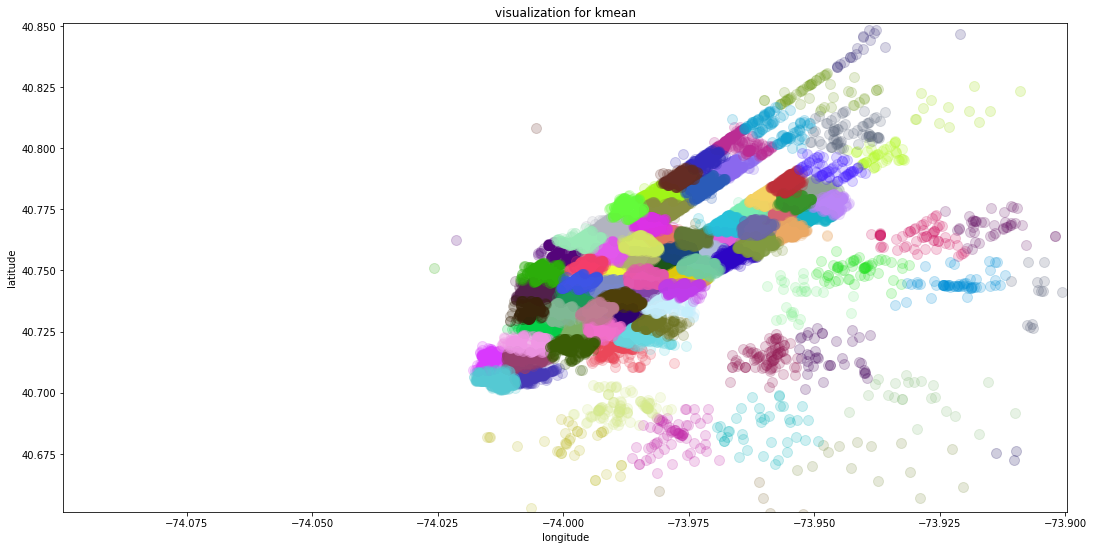

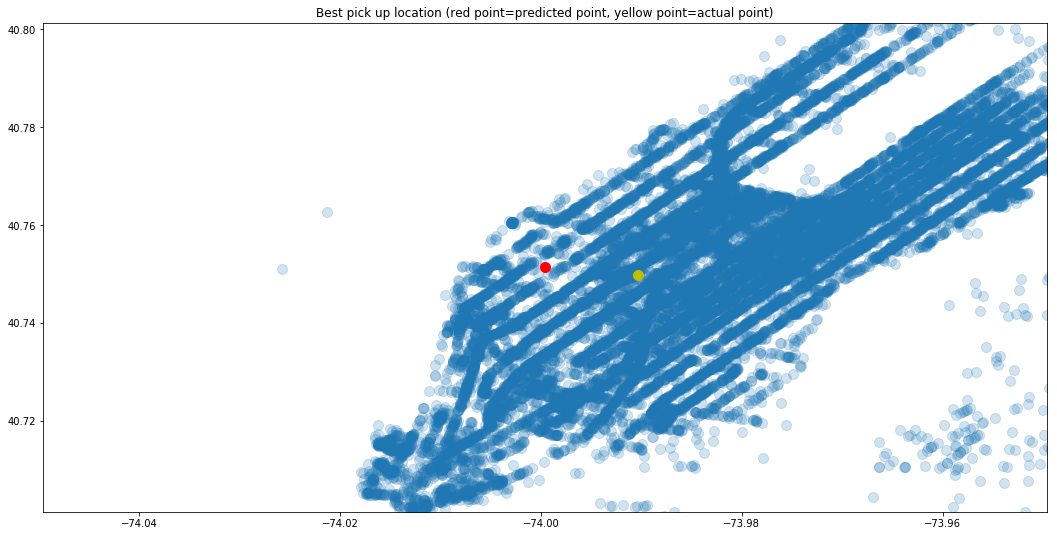

In [120]:
dayweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
poly_regression(9,dayweek[0],model1)

('coefficient of determination (R^2):', (0.13465692015956729, 0.17672698526159644))
('MSE: ', 0.0017125774507040152)
('best location for ', 'Tuesday', array([[-73.99367934,  40.75934737]]))
('address: ', u"427, West 42nd Street, Hell's Kitchen, Manhattan Community Board 4, New York County, NYC, New York, 10036, United States of America")


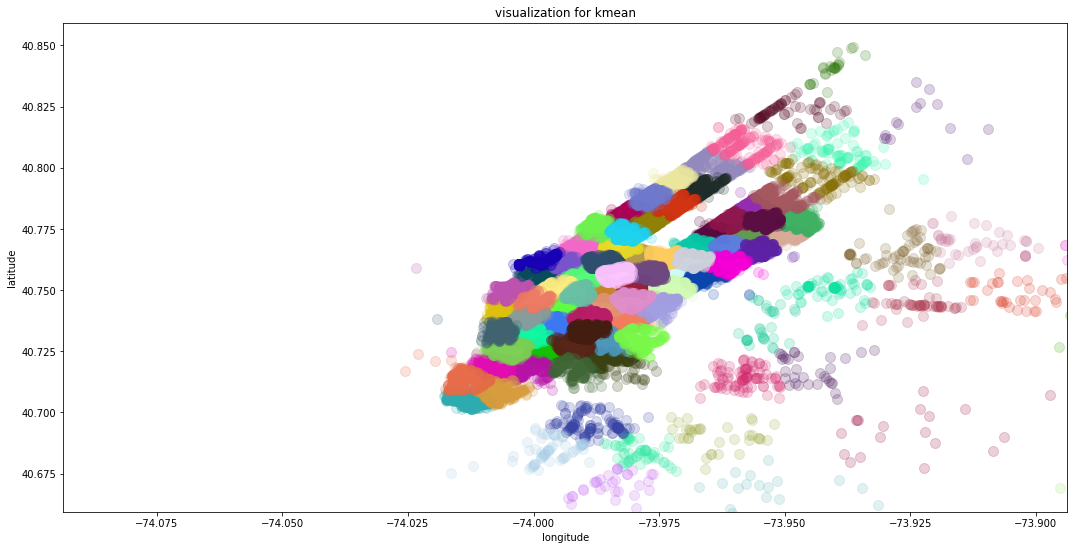

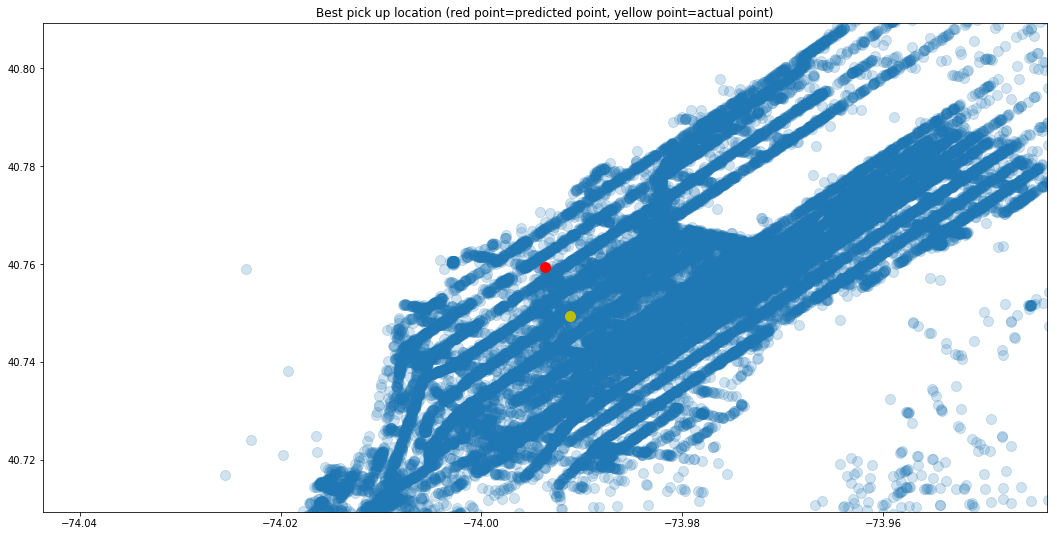

In [121]:
poly_regression(9,dayweek[1],model1)

('coefficient of determination (R^2):', (0.18764229481876138, 0.22221280096261331))
('MSE: ', 0.0013534651588179654)
('best location for ', 'Wednesday', array([[-74.02713513,  40.76794781]]))
('address: ', u'200, Angelique Street, Lincoln Harbor, Weehawken, Hudson County, New Jersey, 07086, United States of America')


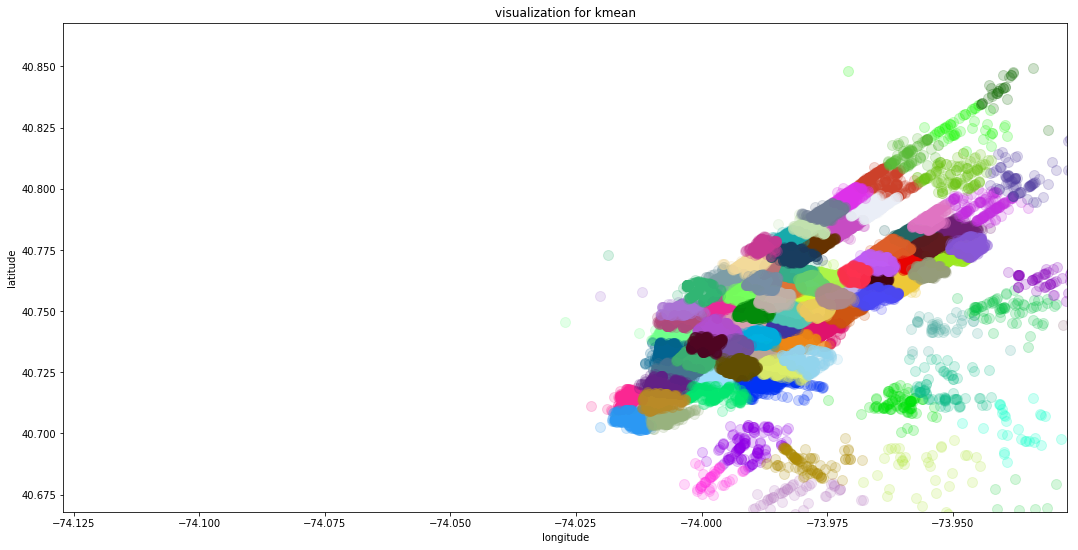

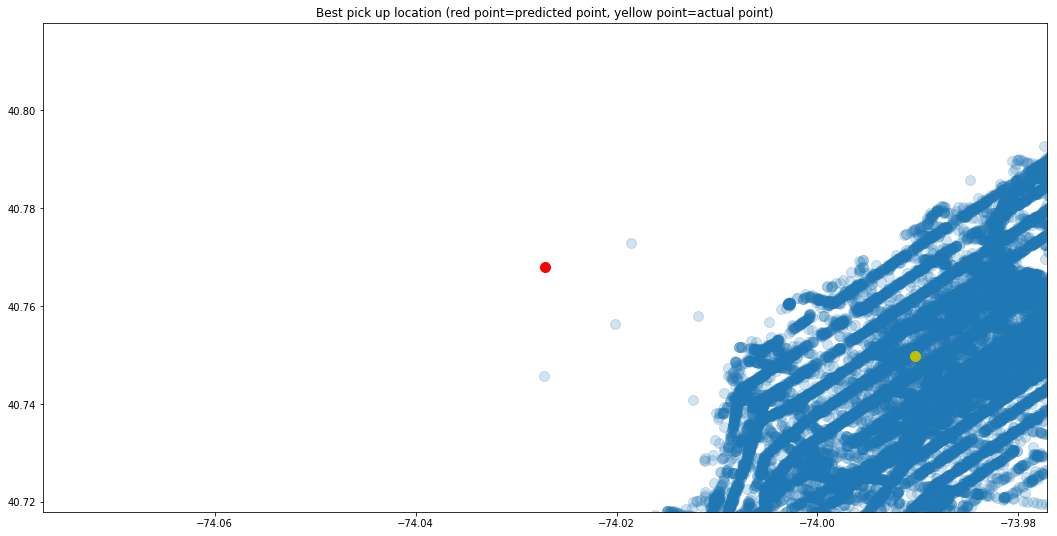

In [122]:
poly_regression(9,dayweek[2],model1)